In [1]:
import numpy as np
import pandas as pd 

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
!unzip -uq "/content/drive/MyDrive/archive" -d "/content/drive/My Drive/archive"

In [4]:
import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/archive/New Masks Dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/MyDrive/archive/New Masks Dataset/Test/Mask/2085.jpg
/content/drive/MyDrive/archive/New Masks Dataset/Test/Mask/2086.jpg
/content/drive/MyDrive/archive/New Masks Dataset/Test/Mask/2072.jpg
/content/drive/MyDrive/archive/New Masks Dataset/Test/Mask/2083.jpg
/content/drive/MyDrive/archive/New Masks Dataset/Test/Mask/2070.jpg
/content/drive/MyDrive/archive/New Masks Dataset/Test/Mask/2205.png
/content/drive/MyDrive/archive/New Masks Dataset/Test/Mask/2113.jpg
/content/drive/MyDrive/archive/New Masks Dataset/Test/Mask/2132.jpg
/content/drive/MyDrive/archive/New Masks Dataset/Test/Mask/2110.jpg
/content/drive/MyDrive/archive/New Masks Dataset/Test/Mask/2179.png
/content/drive/MyDrive/archive/New Masks Dataset/Test/Mask/2174.png
/content/drive/MyDrive/archive/New Masks Dataset/Test/Mask/2215.png
/content/drive/MyDrive/archive/New Masks Dataset/Test/Mask/2154.png
/content/drive/MyDrive/archive/New Masks Dataset/Test/Mask/2176.png
/content/drive/MyDrive/archive/New Masks Dataset

In [5]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

In [6]:
train_dir = '/content/drive/MyDrive/archive/New Masks Dataset/Train'
test_dir = '/content/drive/MyDrive/archive/New Masks Dataset/Test'
validation_dir = '/content/drive/MyDrive/archive/New Masks Dataset/Validation'

train_mask_dir = os.path.join(train_dir, 'Mask')
train_nomask_dir = os.path.join(train_dir, 'Non Mask')

In [7]:
train_mask_names = os.listdir(train_mask_dir)
print(train_mask_names[:10])

train_nomask_names = os.listdir(train_nomask_dir)
print(train_mask_names[:10])

['0019.jpg', '0037.jpg', '0003.jpg', '0006.jpg', '0027.jpg', '0018.jpg', '0022.jpg', '0042.jpg', '0040.jpg', '0029.jpg']
['0019.jpg', '0037.jpg', '0003.jpg', '0006.jpg', '0027.jpg', '0018.jpg', '0022.jpg', '0042.jpg', '0040.jpg', '0029.jpg']


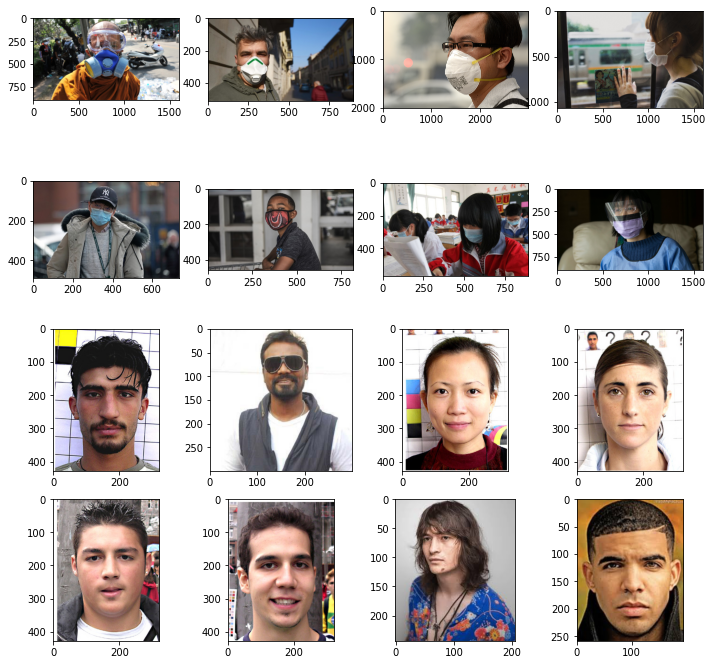

In [8]:
import matplotlib.image as mpimg
cols = 4
rows = 4
plt.figure(figsize = (12,12))
mask_pic = []
for i in train_mask_names[0:8]:
    mask_pic.append(os.path.join(train_mask_dir, i))    
no_mask_pic = []
for i in train_nomask_names[0:8]:
    no_mask_pic.append(os.path.join(train_nomask_dir, i))
merged_list = mask_pic + no_mask_pic
for i in range(len(merged_list)):
    plt.subplot(rows, cols, i+1)
    image = mpimg.imread(merged_list[i])
    plt.imshow(image, cmap='gray')    
plt.show()

In [9]:
train_data_gen = ImageDataGenerator(rescale = 1./255,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
test_data_gen = ImageDataGenerator(rescale = 1. / 255)
validation_data_gen = ImageDataGenerator(rescale = 1. / 255)

train_generator = train_data_gen.flow_from_directory(train_dir, target_size = (150, 150), batch_size=32, class_mode='binary')
test_generator = test_data_gen.flow_from_directory(test_dir, target_size = (150, 150), batch_size=32, class_mode='binary')
validation_generator = validation_data_gen.flow_from_directory(test_dir, target_size = (150, 150), batch_size=32, class_mode='binary')

Found 600 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [10]:
train_generator.class_indices

{'Mask': 0, 'Non Mask': 1}

In [11]:
train_generator.image_shape

(150, 150, 3)

In [12]:
model = Sequential()
model.add(Conv2D(32,(3,3),padding='SAME',activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(64,(3,3),padding='SAME',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 37, 37, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 87616)             0

In [13]:
model.compile(Adam(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [14]:
history = model.fit(train_generator,
                    epochs = 30,
                    validation_data = validation_generator)

Epoch 1/30
19/19 [==============================] - 240s 12s/step - loss: 3.7605 - accuracy: 0.5440 - val_loss: 0.6380 - val_accuracy: 0.5300
Epoch 2/30
19/19 [==============================] - 31s 2s/step - loss: 0.6092 - accuracy: 0.7091 - val_loss: 0.5312 - val_accuracy: 0.8900
Epoch 3/30
19/19 [==============================] - 31s 2s/step - loss: 0.4075 - accuracy: 0.8161 - val_loss: 0.3353 - val_accuracy: 0.9100
Epoch 4/30
19/19 [==============================] - 31s 2s/step - loss: 0.2805 - accuracy: 0.8828 - val_loss: 0.3245 - val_accuracy: 0.9100
Epoch 5/30
19/19 [==============================] - 31s 2s/step - loss: 0.2837 - accuracy: 0.9063 - val_loss: 0.2437 - val_accuracy: 0.9200
Epoch 6/30
19/19 [==============================] - 31s 2s/step - loss: 0.2219 - accuracy: 0.9335 - val_loss: 0.2484 - val_accuracy: 0.9000
Epoch 7/30
19/19 [==============================] - 31s 2s/step - loss: 0.2612 - accuracy: 0.9052 - val_loss: 0.2907 - val_accuracy: 0.9000
Epoch 8/30
19/19 [

In [15]:
test_loss , test_acc = model.evaluate(test_generator)
print('test acc :{} test loss:{}'.format(test_acc,test_loss))

4/4 [==============================] - 2s 496ms/step - loss: 0.1596 - accuracy: 0.9400
test acc :0.9399999976158142 test loss:0.15958309173583984


In [16]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

fname= files.upload()
print(fname)
f=list(fname.keys())[0]
img_path='/content/'+f
img= image.load_img(img_path, target_size=(150,150))
images = image.img_to_array(img)
images=np.expand_dims(images,axis=0)
prediction = model.predict(images)
if prediction==0:
  print('Person is wearing mask')
else:
  print('Person is not wearing mask')

Saving download.jpg to download.jpg
{'download.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00\x84\x00\n\x07\x08\x12\x11\x12\x18\x12\x12\x11\x18\x11\x12\x11\x12\x12\x11\x18\x12\x18\x12\x12\x19\x18\x19\x18\x1a\x18\x19\x19\x1a\x19\x1a\x1a\x1c!.%\x1c\x1e,\x1f\x18\x19&8&+/1555\x1a$;@;3?.451\x01\x0c\x0c\x0c\x10\x0f\x10\x1e\x12\x12\x1a4!$$44444444454441444414444414444144444444444444444444\xff\xc0\x00\x11\x08\x00\xa8\x01,\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1c\x00\x00\x02\x03\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x05\x06\x04\x03\x07\x08\xff\xc4\x00?\x10\x00\x02\x01\x02\x04\x04\x05\x03\x01\x06\x03\x06\x07\x00\x00\x00\x01\x02\x11\x00\x03\x04\x12!1\x05AQa\x06\x13"q\x812\x91\xa1\xb1BRr\xc1\xd1\xf0\x14#\x82$Sb\xc2\xe1\xf1\x07\x15Cc\x83\x92\xa2\xff\xc4\x00\x19\x01\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x02\x01\x03\x04\x05\xff\xc4\x00$\x11\x01\x01\x00\x02\x02\x02\x02\x02\x02\x03\x00\x00\x00\